In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 


import functions 



In [4]:
# import and plot the hydrology part for some area
# then calculate the monthly values 
# see what order of magnitude that is 




In [5]:
path = '/Volumes/T7 Shield/202409_paper2_modelruns/May2025_30years/TL_data/1landcover/langtang_climate_cut/12a/'

test = pd.read_csv(path + 'Hydro.out')


<AxesSubplot:>

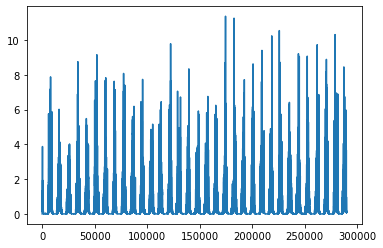

In [6]:
test.Q.plot()

In [18]:

def water_balance_components_in_mm(hydro, column, area=4830.0):
    """
    Calculate the sum of water or sediment volume per month for a specific column, 
    and return the mean volumes across years.
    
    Parameters:
    hydro (pd.DataFrame): Input DataFrame with columns `D` (date) and the specified numeric column.
    column (str): The name of the column to calculate the volume for.
    area (float): Area in square meters used to scale the volumes. Default is 4830.0.
    
    Returns:
    pd.DataFrame: DataFrame with the calculated monthly volumes.
    """
    # Ensure `D` column is in datetime format
    hydro['D'] = pd.to_datetime(hydro['D'])

    if column == 'snowmelt':
        hydro['snowmelt'] = hydro['snowacc'].where(hydro['snowacc'] < 0).fillna(0)
    if column == 'snowacc2':
        hydro['snowacc2'] = hydro['snowacc'].where(hydro['snowacc'] > 0).fillna(0)
    if column == 'rainfall':
        hydro['rainfall'] = hydro['Pr'] - hydro['snowacc']
        hydro['rainfall'] = hydro['rainfall'].fillna(0)
        
    
    # Scale the specified column by the area
    hydro[column] = hydro[[column]]
    
    # Set 'D' as the index
    hydro = hydro.set_index('D')
    
    # Resample to monthly data and calculate the sum for each month for the specified column
    hydro_month = hydro[column].resample('M').sum()
    hydro_month = hydro_month.reset_index()
    
    # Extract year and month for grouping or further analysis
    hydro_month['year'] = hydro_month['D'].dt.year
    hydro_month['month'] = hydro_month['D'].dt.month
    
    return hydro_month


<AxesSubplot:>

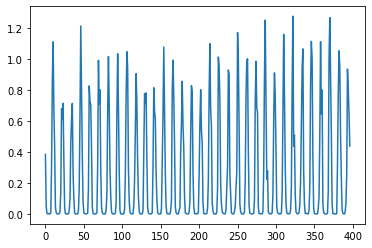

In [17]:
test1 = water_balance_components_in_mm(test, 'Q')

test1.Q.plot()

In [19]:
test2 = water_balance_components_in_mm(test, 'Q')


<AxesSubplot:>

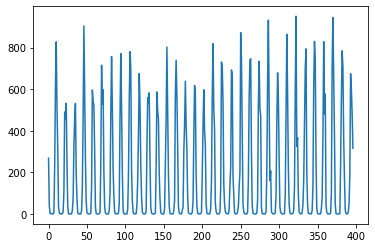

In [20]:
test2.Q.plot()

In [9]:
hydro = test
column ='Q'
# Ensure `D` column is in datetime format
hydro['D'] = pd.to_datetime(hydro['D'])


In [10]:
# Scale the specified column by the area
hydro[column] = hydro[[column]]
    
# Set 'D' as the index
hydro = hydro.set_index('D')
    
hydro_month_sum = hydro[column].resample('M').sum()#.reset_index()


In [11]:
hydro_month_mean = hydro_month_sum.resample('M').mean()

In [12]:
hydro_month_mean = hydro_month_mean.reset_index()

In [13]:


# Extract year and month for grouping or further analysis
hydro_month_mean['year'] = hydro_month_mean['D'].dt.year
hydro_month_mean['month'] = hydro_month_mean['D'].dt.month

In [14]:
hydro_month_mean = hydro_month_mean.set_index('D')

<AxesSubplot:xlabel='D'>

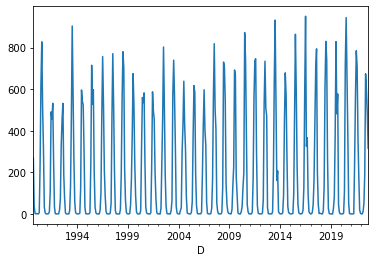

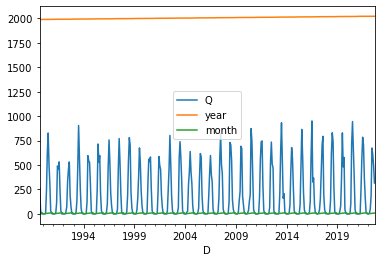

In [15]:
hydro_month_sum.plot()
hydro_month_mean.plot()

In [16]:
# Resample to monthly data and calculate the sum for each month for the specified column
hydro_month = hydro[column].resample('M').mean().reset_index()
# Extract year and month for grouping or further analysis
    hydro_month['year'] = hydro_month['D'].dt.year
    hydro_month['month'] = hydro_month['D'].dt.month
    


IndentationError: unexpected indent (3929973959.py, line 2)